# Example use of Aroma Classification

In [1]:
%matplotlib inline
from __future__ import print_function, division
import matplotlib.pyplot as plt
import numpy as np

import sys
sys.path.insert(0, '..')
import icaaroma.aroma as aroma

Test files

In [2]:
ftmixfile = '../tests/refout/melodic.ica/melodic_FTmix'
ftmix = np.loadtxt(ftmixfile)

mixfile = '../tests/refout/melodic.ica/melodic_mix'
mix = np.loadtxt(mixfile)

t_r = 2.0

mcfile = '../tests/refin/mc/prefiltered_func_data_mcf.par'
mc = np.loadtxt(mcfile)

melodic_ics_file_mni = '../tests/refout/melodic_IC_thr_MNI2mm.nii.gz'

In [3]:
hfc = aroma.feature_frequency(ftmix, t_r=t_r)
fts = aroma.feature_time_series(mix, rparams=mc)
edge_frac, csf_frac = aroma.feature_spatial(melodic_ics_file_mni)

rejected_components = aroma.classification(fts, edge_frac, hfc, csf_frac)

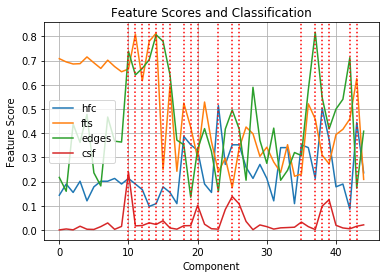

In [4]:
plt.plot(hfc, label='hfc')
plt.plot(fts, label='fts')
plt.plot(edge_frac, label='edges')
plt.plot(csf_frac, label='csf')
for i in rejected_components:
    plt.axvline(i, linestyle='dotted', color='red')
plt.legend()
plt.xlabel('Component')
plt.ylabel('Feature Score')
plt.grid(True)
plt.title('Feature Scores and Classification');